# Problem Statement

The problem consists in building a predictive model capable of accurately estimating the sales of each product in a particular store on the basis of the data provided. The aim is to identify the key properties of products and stores that have a significant impact on sales.

# Hypothesis Generation

- The weight of a product significantly affects its sales.
- The level of fat content in a product significantly affects its sales.
- The visibility of a product on the shelves significantly affects its sales.
- The type of product significantly affects its sales.
- The size of the outlet significantly affects the sales of a product.
- The location of the outlet significantly affects the sales of a product.
- The type of outlet significantly affects the sales of a product.

# Loading Packages and Data

In [1]:
import pandas as pd 
import numpy as np
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns

In [53]:
# Path of the file to read
filepath = "C:/Users/HAMZA/Downloads/9961_14084_bundle_archive/Train.csv"

# Read the file into a variable 
dataset =pd.read_csv(filepath)
print(dataset.shape)

(8523, 12)


# Data Structure, Content and Exploratory Data Analysis(EDA)

In [54]:
dataset.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [55]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [56]:
dataset.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [57]:
# get the number of missing data points per column
missing_values_count =dataset.isnull().sum()
print(missing_values_count)

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64


In [58]:
#Duplicate records
duplicate = dataset.duplicated()
print("number of duplicate records:",duplicate.sum())

number of duplicate records: 0


In [59]:
#categorical columns
categorical_columns = dataset.select_dtypes(include=['object', 'category']).columns
print(categorical_columns)

# Get number of unique entries in each column with categorical data
object_nunique = list(map(lambda col: dataset[col].nunique(), categorical_columns))
d = dict(zip(categorical_columns, object_nunique))

# Print number of unique entries by column, in ascending order
sorted(d.items(), key=lambda x: x[1])



Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')


[('Outlet_Size', 3),
 ('Outlet_Location_Type', 3),
 ('Outlet_Type', 4),
 ('Item_Fat_Content', 5),
 ('Outlet_Identifier', 10),
 ('Item_Type', 16),
 ('Item_Identifier', 1559)]

In [60]:
# print the categorical columns
for col in categorical_columns:
    print(col)
    print(dataset[col].value_counts())
    print()

Item_Identifier
FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: Item_Identifier, Length: 1559, dtype: int64

Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

Outlet_Identifier
OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
O

# Exploratory Data Analysis

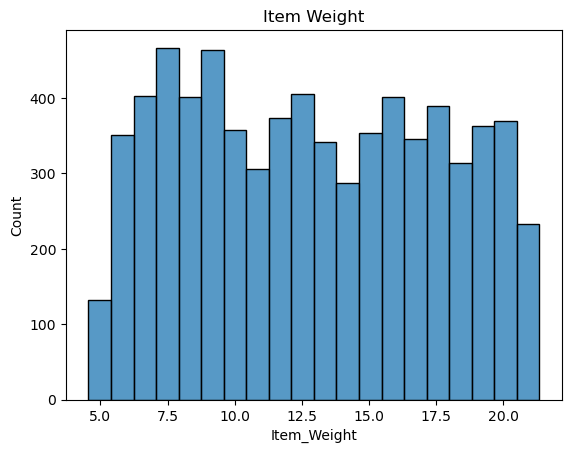

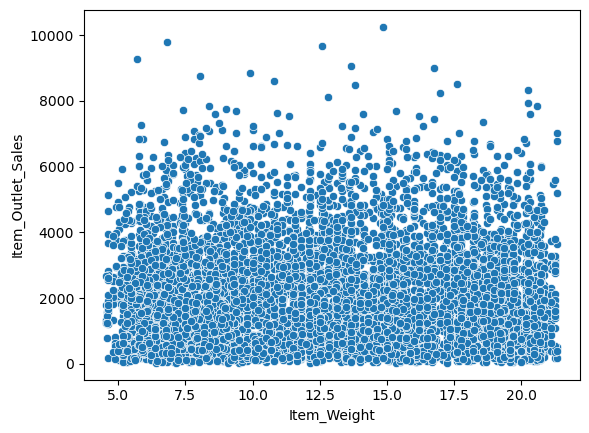

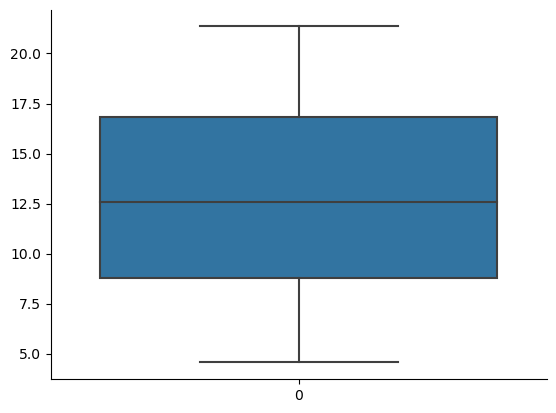

In [61]:
#Histogram
#The distribution of Item weight 
sns.histplot(data=dataset, x='Item_Weight')
plt.title('Item Weight')
plt.show()

#Relation between Item_Weight and Item_Outlet_Sales
sns.scatterplot(x=dataset['Item_Weight'], y=dataset['Item_Outlet_Sales'])
plt.show()

# item weight is normally distributed or not?
sns.boxplot(dataset['Item_Weight']) 
sns.despine()

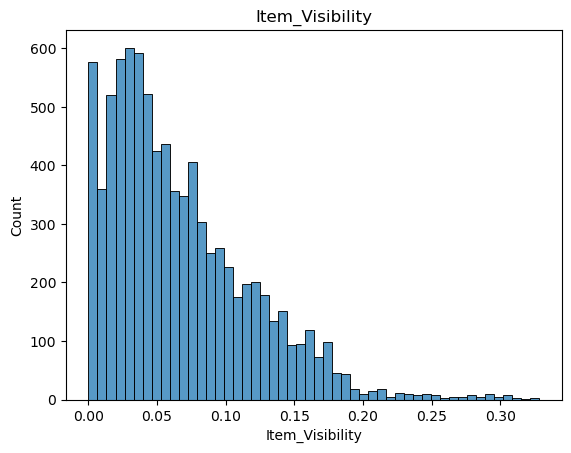

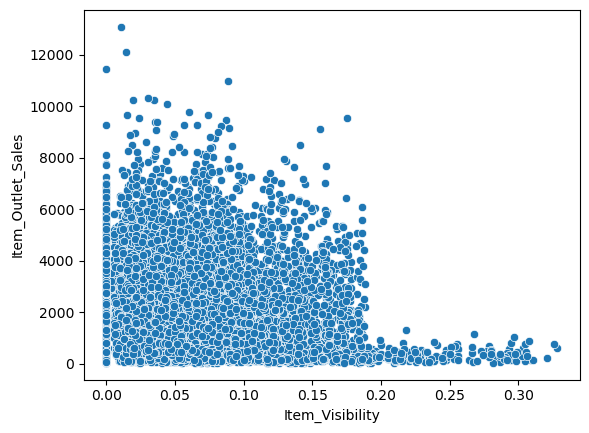

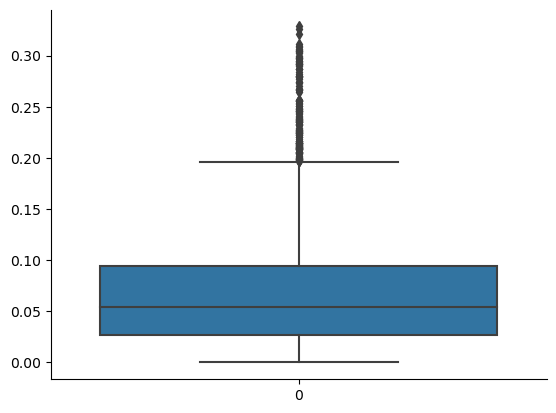

In [62]:
#Histogram
#The distribution of Item_Visibility
sns.histplot(data=dataset, x='Item_Visibility')
plt.title('Item_Visibility')
plt.show()

#Relation between Item_Visibility and Item_Outlet_Sales
sns.scatterplot(x=dataset['Item_Visibility'], y=dataset['Item_Outlet_Sales'])
#sns.regplot(x=dataset['Item_Visibility'], y=dataset['Item_Outlet_Sales'])
plt.show()

# Item_Visibility is normally distributed or not?
sns.boxplot(dataset['Item_Visibility']) 
sns.despine()

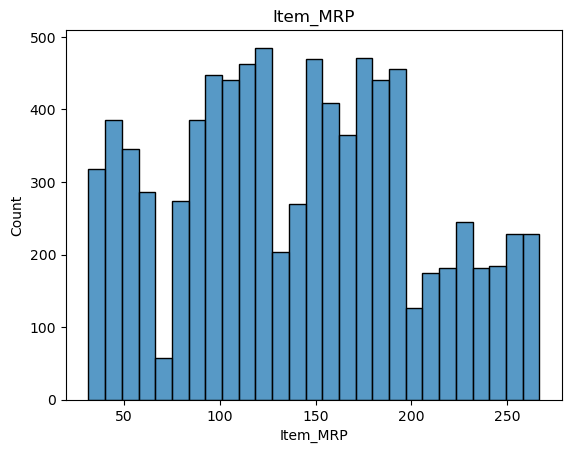

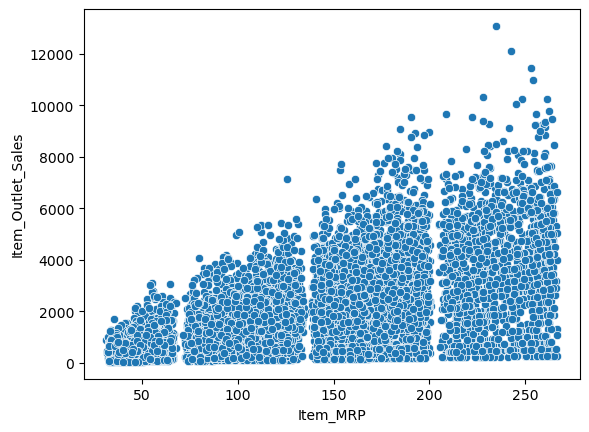

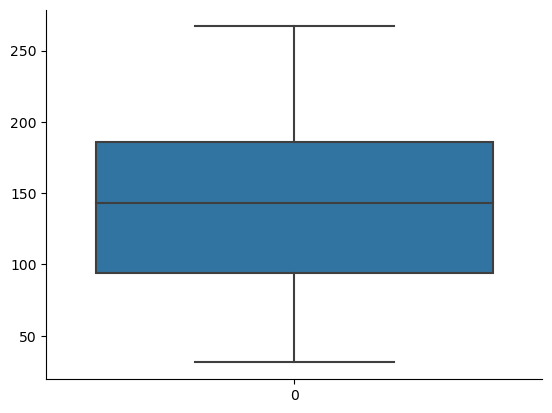

In [63]:
#Histogram
#The distribution of Item_MRP
sns.histplot(data=dataset, x='Item_MRP')
plt.title('Item_MRP')
plt.show()

#Relation between Item_MRP and Item_Outlet_Sales
sns.scatterplot(x=dataset['Item_MRP'], y=dataset['Item_Outlet_Sales'])
#sns.regplot(x=dataset['Item_MRP'], y=dataset['Item_Outlet_Sales'])
plt.show()

# Item_MRP is normally distributed or not?
sns.boxplot(dataset['Item_MRP']) 
sns.despine()

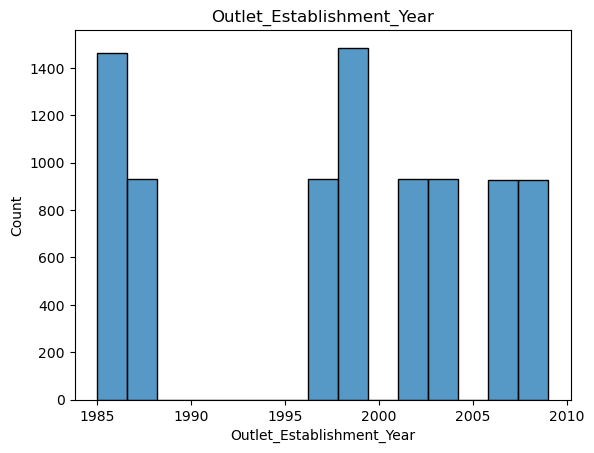

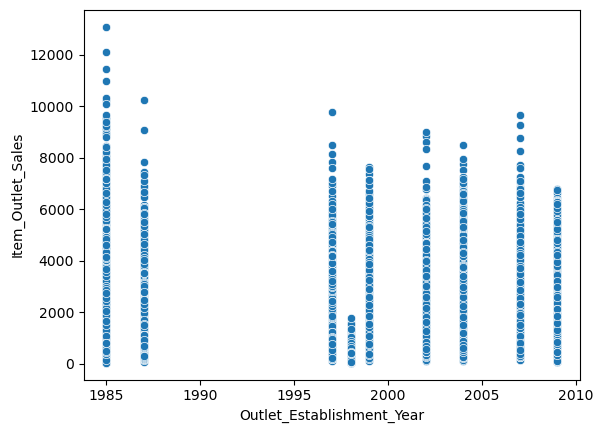

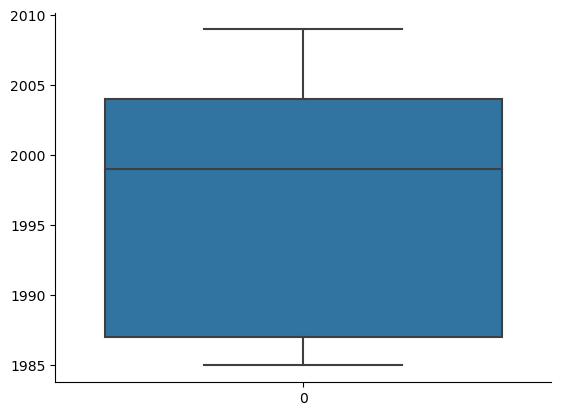

In [64]:
#Histogram
#The distribution of Outlet_Establishment_Year
sns.histplot(data=dataset, x='Outlet_Establishment_Year')
plt.title('Outlet_Establishment_Year')
plt.show()

#Relation between Outlet_Establishment_Year and Item_Outlet_Sales
sns.scatterplot(x=dataset['Outlet_Establishment_Year'], y=dataset['Item_Outlet_Sales'])
#sns.regplot(x=dataset['Outlet_Establishment_Year'], y=dataset['Item_Outlet_Sales'])
plt.show()

# Outlet_Establishment_Year is normally distributed or not?
sns.boxplot(dataset['Outlet_Establishment_Year']) 
sns.despine()

Text(0.5, 1.0, 'Outlet Size')

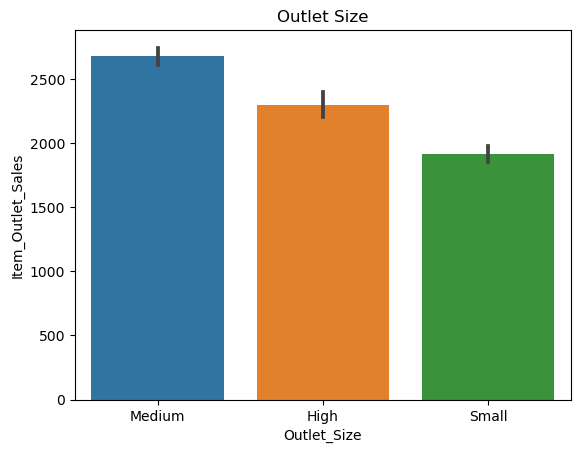

In [65]:
# Histogram
#sns.histplot(dataset['Outlet_Size'])
#plt.show()

# Bar chart
sns.barplot(x=dataset['Outlet_Size'], y=dataset['Item_Outlet_Sales'])
# Add label for vertical axis
plt.ylabel("Item_Outlet_Sales")

plt.title('Outlet Size')


Text(0.5, 1.0, 'Outlet Location Type')

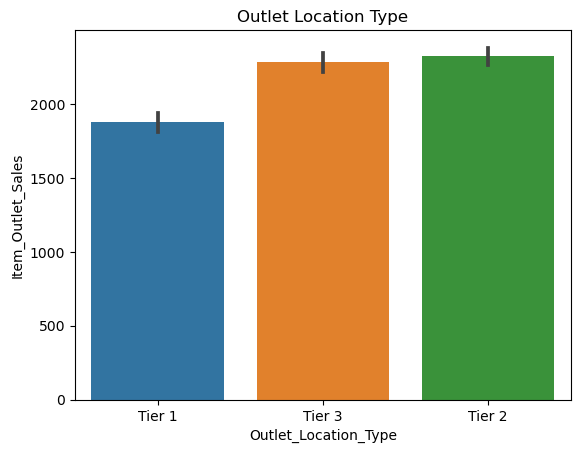

In [66]:
# Histogram
#sns.histplot(dataset['Outlet_Location_Type'])
#plt.show()

# Bar chart 
sns.barplot(x=dataset['Outlet_Location_Type'], y=dataset['Item_Outlet_Sales'])
# Add label for vertical axis
plt.ylabel("Item_Outlet_Sales")

plt.title('Outlet Location Type')

Text(0.5, 1.0, 'Outlet Type')

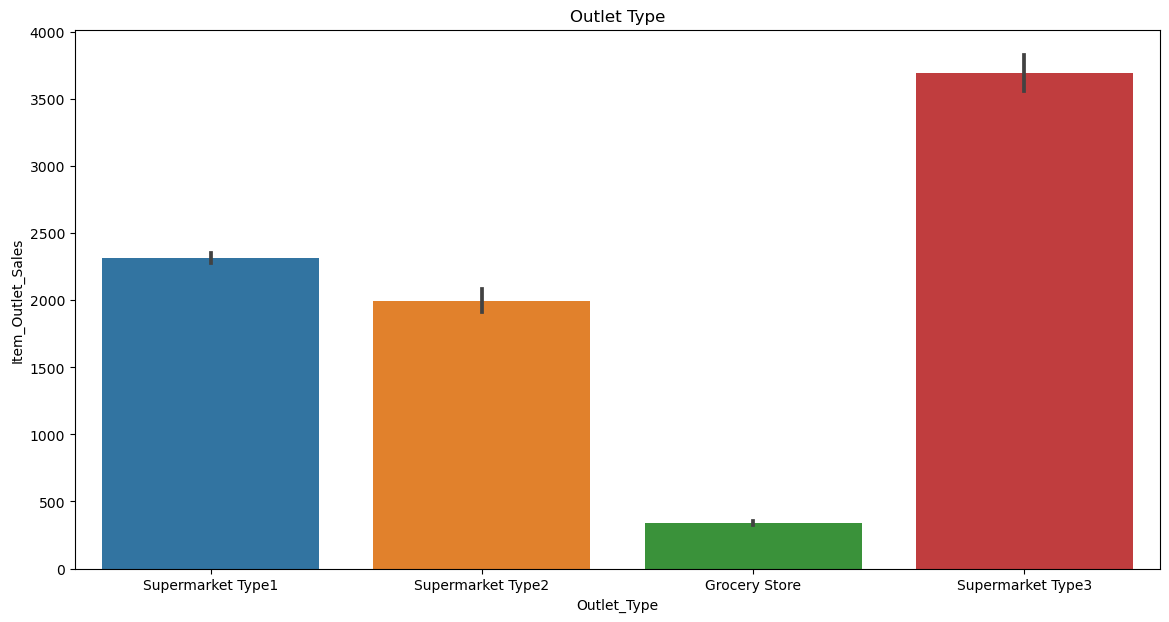

In [67]:
plt.figure(figsize=(14,7))
# Histogram
#sns.histplot(dataset['Outlet_Type'])
#plt.show()

# Bar chart 
sns.barplot(x=dataset['Outlet_Type'], y=dataset['Item_Outlet_Sales'])
# Add label for vertical axis
plt.ylabel("Item_Outlet_Sales")

plt.title('Outlet Type')

Text(0.5, 1.0, 'Item Fat Content')

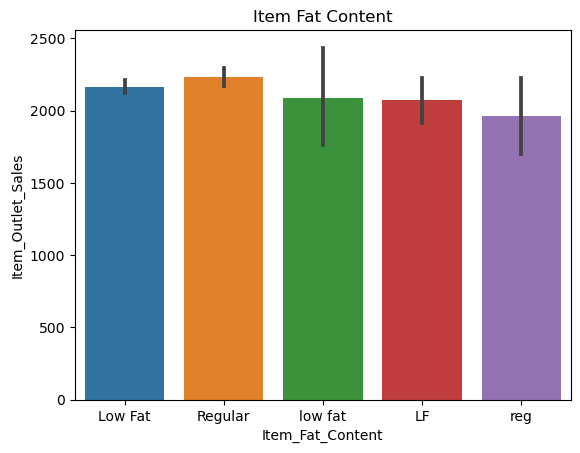

In [68]:
# Histogram
#sns.histplot(dataset['Item_Fat_Content'])
#plt.show()

# Bar chart 
sns.barplot(x=dataset['Item_Fat_Content'], y=dataset['Item_Outlet_Sales'])
# Add label for vertical axis
plt.ylabel("Item_Outlet_Sales")

plt.title('Item Fat Content')

observation: There are inconsistent data entries for the "item_fat_content" attribute: (Low Fat, low fat, LF) and (Regular , Reg)

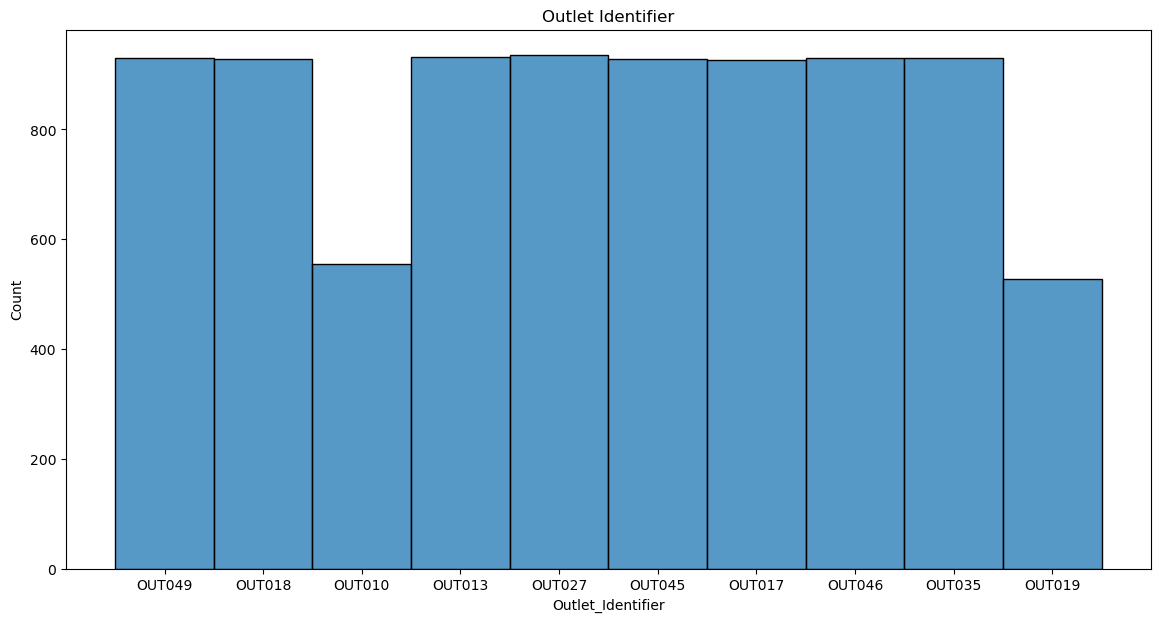

In [69]:
plt.figure(figsize=(14,7))
# Histogram
sns.histplot(dataset['Outlet_Identifier'])
plt.title('Outlet Identifier')
plt.show()

# Bar chart 
#sns.barplot(x=dataset['Outlet_Identifier'], y=dataset['Item_Outlet_Sales'])
# Add label for vertical axis
#plt.ylabel("Item_Outlet_Sales")



Text(0.5, 1.0, 'Item Type')

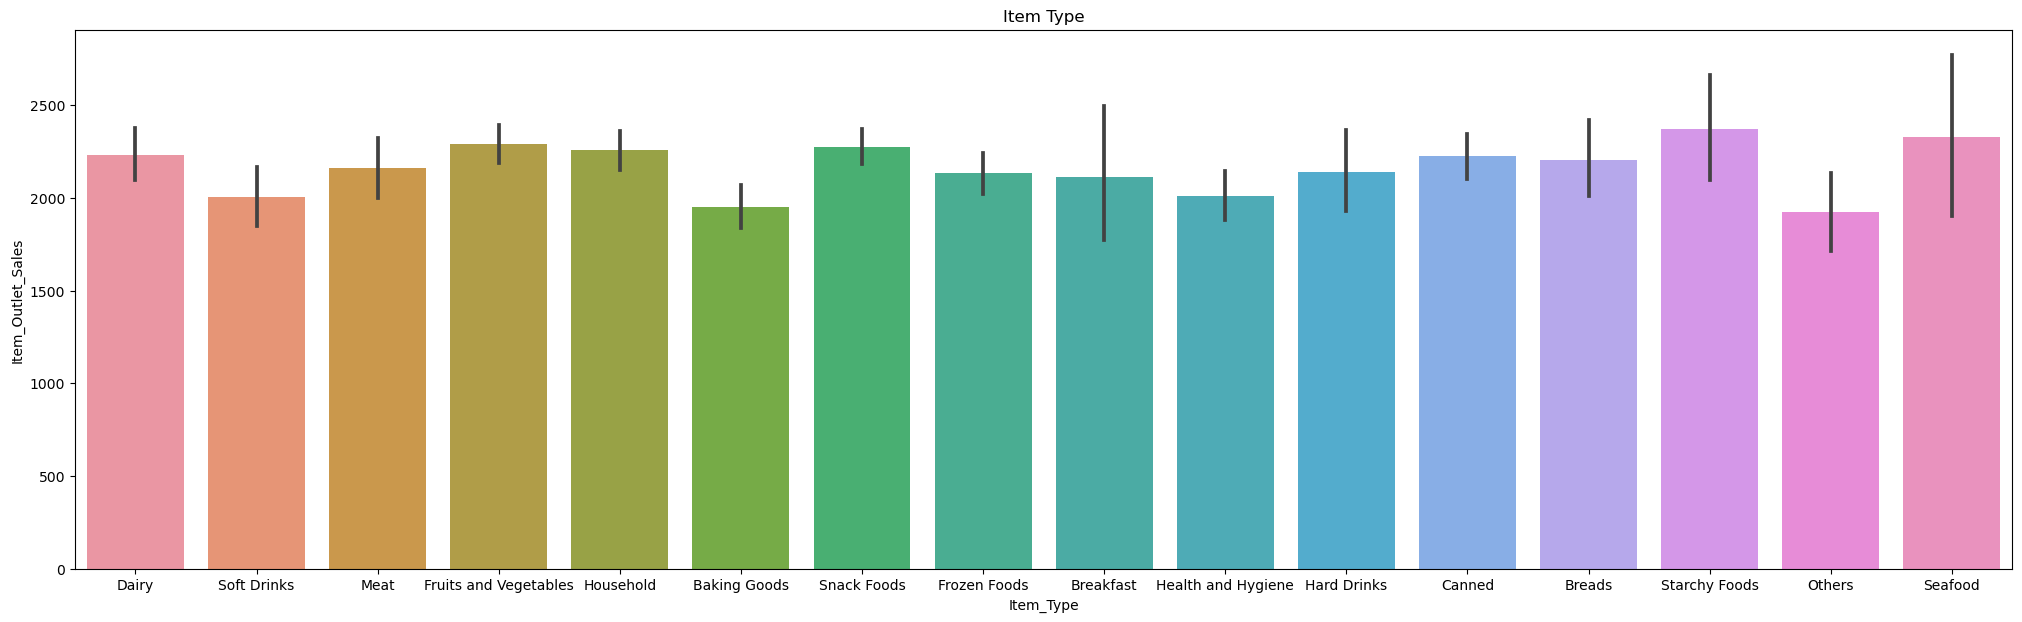

In [70]:
plt.figure(figsize=(25,7))
# Histogram
#sns.histplot(dataset['Item_Type'])
#plt.show()

# Bar chart
sns.barplot(x=dataset['Item_Type'], y=dataset['Item_Outlet_Sales'])
# Add label for vertical axis
plt.ylabel("Item_Outlet_Sales")

plt.title('Item Type')

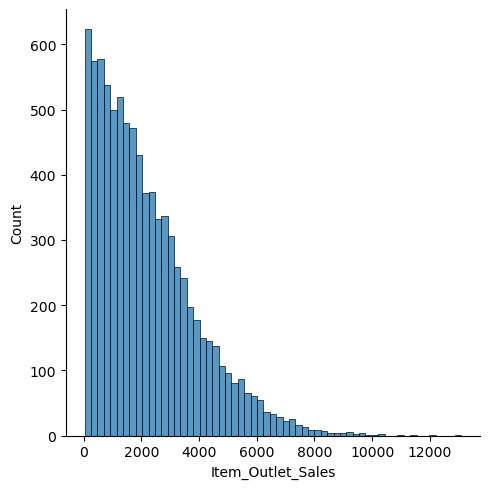

In [71]:
sns.displot(dataset['Item_Outlet_Sales'])

In [72]:
#Normalizing and Scaling
# log transformation
dataset['Item_Outlet_Sales'] = np.log(1+dataset['Item_Outlet_Sales'])

In [73]:
dataset.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,8.225808
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,6.096776
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,7.648868
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,6.597664
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,6.903451


C:\Users\HAMZA\AppData\Local\Temp\ipykernel_8952\2198417466.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = dataset.corr()


<Axes: >

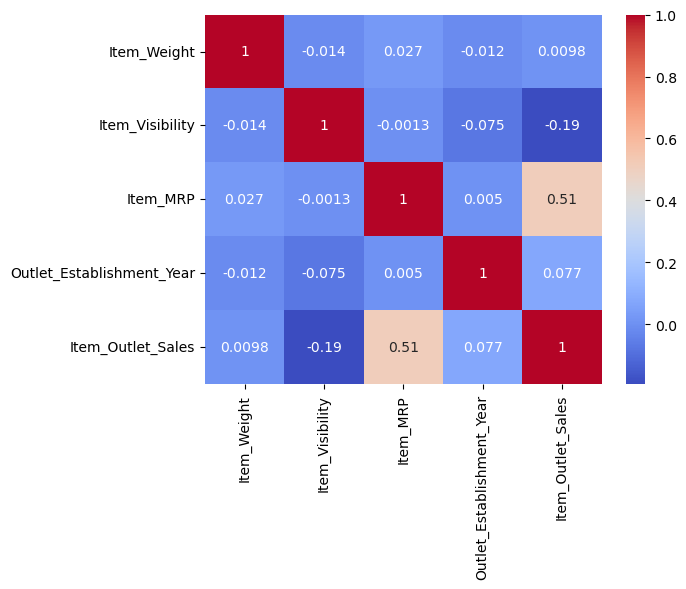

In [74]:
#Coorelation Matrix
corr = dataset.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')

In [75]:
# statistical info
dataset.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,7.297863
std,4.643456,0.051598,62.275067,8.371760,1.015211
min,4.555000,0.000000,31.290000,1985.000000,3.534854
25%,8.773750,0.026989,93.826500,1987.000000,6.727728
50%,12.600000,0.053931,143.012800,1999.000000,7.492945
75%,16.850000,0.094585,185.643700,2004.000000,8.039898
max,21.350000,0.328391,266.888400,2009.000000,9.479448


# Convert "Outlet_Establishment_Year" attribute to date data type

In [76]:
import pandas as pd

# Convert "Outlet_Establishment_Year" attribute to date data type
dataset['Outlet_Establishment_Year'] = pd.to_datetime(dataset['Outlet_Establishment_Year'], format='%Y')

# Check the data type after conversion
print(dataset['Outlet_Establishment_Year'].dtype)


datetime64[ns]


In [77]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Item_Identifier            8523 non-null   object        
 1   Item_Weight                7060 non-null   float64       
 2   Item_Fat_Content           8523 non-null   object        
 3   Item_Visibility            8523 non-null   float64       
 4   Item_Type                  8523 non-null   object        
 5   Item_MRP                   8523 non-null   float64       
 6   Outlet_Identifier          8523 non-null   object        
 7   Outlet_Establishment_Year  8523 non-null   datetime64[ns]
 8   Outlet_Size                6113 non-null   object        
 9   Outlet_Location_Type       8523 non-null   object        
 10  Outlet_Type                8523 non-null   object        
 11  Item_Outlet_Sales          8523 non-null   float64       
dtypes: dat

# Missing Value Treatment

In [78]:
# get the number of missing data points per column
missing_values_count =dataset.isnull().sum()
print(missing_values_count)

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64


In [79]:
# Fill missing values in the 'Outlet_Size' column with 'Unknown'
dataset['Outlet_Size'].fillna('Unknown', inplace=True)

In [80]:
# get the number of missing data points per column
missing_values_count =dataset.isnull().sum()
print(missing_values_count)

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                     0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64


In [81]:
dataset.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999-01-01,Medium,Tier 1,Supermarket Type1,8.225808
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009-01-01,Medium,Tier 3,Supermarket Type2,6.096776
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999-01-01,Medium,Tier 1,Supermarket Type1,7.648868
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998-01-01,Unknown,Tier 3,Grocery Store,6.597664
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987-01-01,High,Tier 3,Supermarket Type1,6.903451


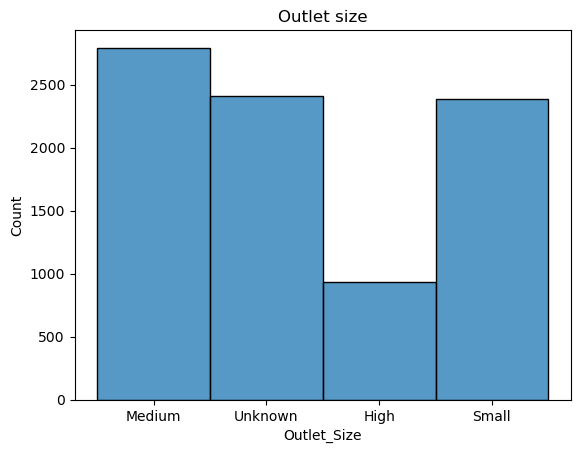

In [82]:
# Histogram
sns.histplot(dataset['Outlet_Size'])
plt.title('Outlet size')
plt.show()


In [83]:
# Fill missing values in the 'Item_Weight' column with the mean
mean_value = dataset['Item_Weight'].mean()
dataset['Item_Weight'].fillna(mean_value, inplace=True)


In [84]:
# get the number of missing data points per column
missing_values_count =dataset.isnull().sum()
print(missing_values_count)

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64


In [85]:
# replace Item_Visibility zeros with mean
dataset.loc[:, 'Item_Visibility'].replace([0], [dataset['Item_Visibility'].mean()], inplace=True)
sum(dataset['Item_Visibility']==0)

0

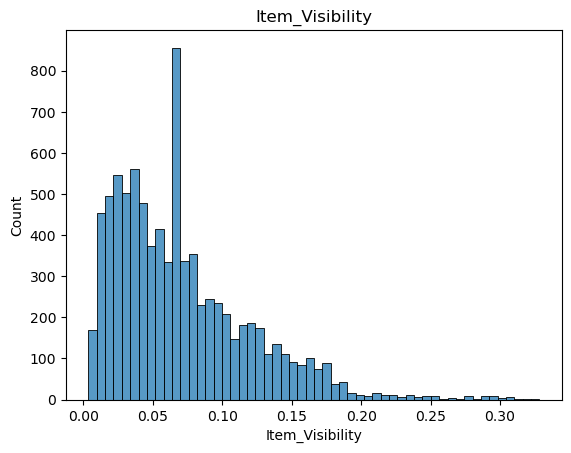

In [86]:
# Histogram
sns.histplot(dataset['Item_Visibility'])
plt.title('Item_Visibility')
plt.show()

# Inconsistent Data Entry

In [87]:
# combine item fat content
dataset['Item_Fat_Content'] = dataset['Item_Fat_Content'].replace({'LF':'Low Fat', 'reg':'Regular', 'low fat':'Low Fat'})
dataset['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

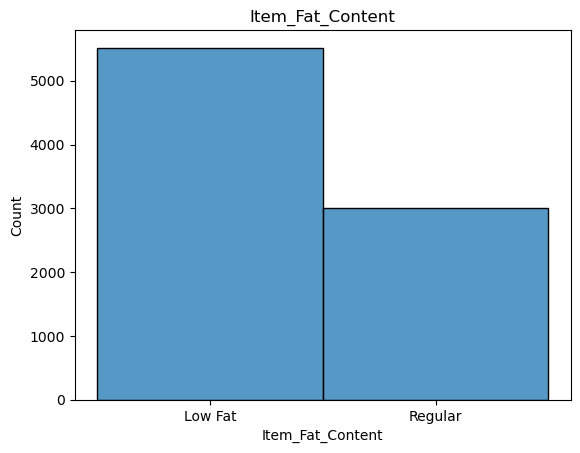

In [88]:
# Histogram
sns.histplot(dataset['Item_Fat_Content'])
plt.title('Item_Fat_Content')
plt.show()

# Feature Engineering - Creation of New Attributes

In [89]:
dataset['Type_Item'] = dataset['Item_Identifier'].apply(lambda x: x[:2])
dataset['Type_Item'] = dataset['Type_Item'].map({'FD':'Food', 'NC':'Non_Consumable', 'DR':'Drink'})
dataset['Type_Item'].value_counts()

Food              6125
Non_Consumable    1599
Drink              799
Name: Type_Item, dtype: int64

In [90]:
# Update 'Item_Fat_Content' for non-consumable items and display value counts
dataset.loc[dataset['Type_Item'] == 'Non_Consumable', 'Item_Fat_Content'] = 'Non_Edible'
dataset['Item_Fat_Content'].value_counts()

Low Fat       3918
Regular       3006
Non_Edible    1599
Name: Item_Fat_Content, dtype: int64

In [91]:
dataset.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Type_Item
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999-01-01,Medium,Tier 1,Supermarket Type1,8.225808,Food
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009-01-01,Medium,Tier 3,Supermarket Type2,6.096776,Drink
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999-01-01,Medium,Tier 1,Supermarket Type1,7.648868,Food
3,FDX07,19.20,Regular,0.066132,Fruits and Vegetables,182.0950,OUT010,1998-01-01,Unknown,Tier 3,Grocery Store,6.597664,Food
4,NCD19,8.93,Non_Edible,0.066132,Household,53.8614,OUT013,1987-01-01,High,Tier 3,Supermarket Type1,6.903451,Non_Consumable


# Encoding Categorical Variables

In [92]:
#categorical columns
categorical_columns = dataset.select_dtypes(include=['object', 'category']).columns
print(categorical_columns)

# Get number of unique entries in each column with categorical data
object_nunique = list(map(lambda col: dataset[col].nunique(), categorical_columns))
d = dict(zip(categorical_columns, object_nunique))

# Print number of unique entries by column, in ascending order
sorted(d.items(), key=lambda x: x[1])

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type', 'Type_Item'],
      dtype='object')


[('Item_Fat_Content', 3),
 ('Outlet_Location_Type', 3),
 ('Type_Item', 3),
 ('Outlet_Size', 4),
 ('Outlet_Type', 4),
 ('Outlet_Identifier', 10),
 ('Item_Type', 16),
 ('Item_Identifier', 1559)]

# - Label Encoding

In [93]:
# Label encoding for 'Outlet_Identifier' and 'Item_Type' attributes

from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
dataset['Outlet'] = label_encoder.fit_transform(dataset['Outlet_Identifier'])
dataset['ItemType'] = label_encoder.fit_transform(dataset['Item_Type'])

# Onehot Encoding

In [94]:
dataset = pd.get_dummies(dataset, columns=['Item_Fat_Content', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type', 'Type_Item'])

In [95]:
dataset.head()

,Item_Identifier,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Item_Outlet_Sales,Outlet,ItemType,...,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Type_Item_Drink,Type_Item_Food,Type_Item_Non_Consumable
0,FDA15,9.30,0.016047,Dairy,249.8092,OUT049,1999-01-01,8.225808,9,4,...,1,0,0,0,1,0,0,0,1,0
1,DRC01,5.92,0.019278,Soft Drinks,48.2692,OUT018,2009-01-01,6.096776,3,14,...,0,0,1,0,0,1,0,1,0,0
2,FDN15,17.50,0.016760,Meat,141.6180,OUT049,1999-01-01,7.648868,9,10,...,1,0,0,0,1,0,0,0,1,0
3,FDX07,19.20,0.066132,Fruits and Vegetables,182.0950,OUT010,1998-01-01,6.597664,0,6,...,0,0,1,1,0,0,0,0,1,0
4,NCD19,8.93,0.066132,Household,53.8614,OUT013,1987-01-01,6.903451,1,9,...,0,0,1,0,1,0,0,0,0,1


In [96]:
#categorical columns
categorical_columns = dataset.select_dtypes(include=['object', 'category']).columns
print(categorical_columns)

# Get number of unique entries in each column with categorical data
object_nunique = list(map(lambda col: dataset[col].nunique(), categorical_columns))
d = dict(zip(categorical_columns, object_nunique))

# Print number of unique entries by column, in ascending order
sorted(d.items(), key=lambda x: x[1])

Index(['Item_Identifier', 'Item_Type', 'Outlet_Identifier'], dtype='object')


[('Outlet_Identifier', 10), ('Item_Type', 16), ('Item_Identifier', 1559)]

# Modeling

In [97]:
#Input Split

X = dataset.drop(columns=['Outlet_Establishment_Year', 'Item_Identifier', 'Outlet_Identifier', 'Item_Outlet_Sales','Item_Type'])
y = dataset['Item_Outlet_Sales']

In [98]:
X.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet,ItemType,Item_Fat_Content_Low Fat,Item_Fat_Content_Non_Edible,Item_Fat_Content_Regular,Outlet_Size_High,Outlet_Size_Medium,...,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Type_Item_Drink,Type_Item_Food,Type_Item_Non_Consumable
0,9.30,0.016047,249.8092,9,4,1,0,0,0,1,...,1,0,0,0,1,0,0,0,1,0
1,5.92,0.019278,48.2692,3,14,0,0,1,0,1,...,0,0,1,0,0,1,0,1,0,0
2,17.50,0.016760,141.6180,9,10,1,0,0,0,1,...,1,0,0,0,1,0,0,0,1,0
3,19.20,0.066132,182.0950,0,6,0,0,1,0,0,...,0,0,1,1,0,0,0,0,1,0
4,8.93,0.066132,53.8614,1,9,0,1,0,1,0,...,0,0,1,0,1,0,0,0,0,1


# Linear Regression

In [99]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
def train(model, X, y):
    # train the model
    model.fit(X, y)
    
    # predict the training set
    pred = model.predict(X)
    
    # perform cross-validation
    cv_score = cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=5)
    cv_score = np.abs(np.mean(cv_score))
    
    print("Model Report")
    print("MSE:",mean_squared_error(y,pred))
    print("CV Score:", cv_score)

Model Report
MSE: 0.28800650325017957
CV Score: 0.2891182742641595


<Axes: title={'center': 'Model Coefficients'}>

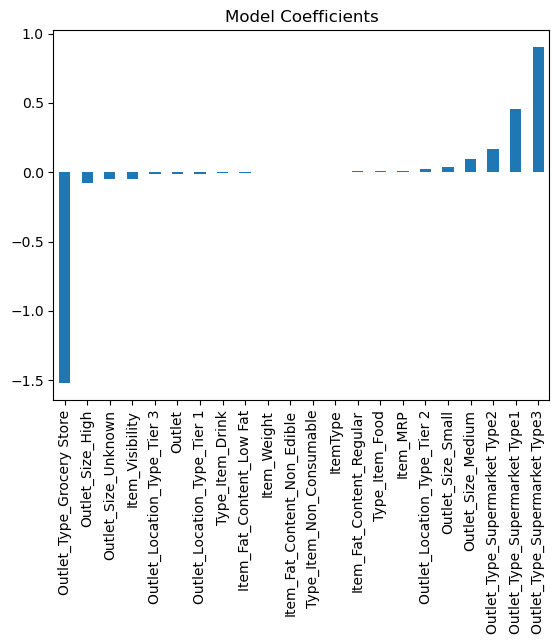

In [100]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
model = LinearRegression()
train(model, X, y)
coef = pd.Series(model.coef_, X.columns).sort_values()
coef.plot(kind='bar', title="Model Coefficients")

# Regularized Linear Regression

Model Report
MSE: 0.2880066078186034
CV Score: 0.2891173130831903


<Axes: title={'center': 'Model Coefficients'}>

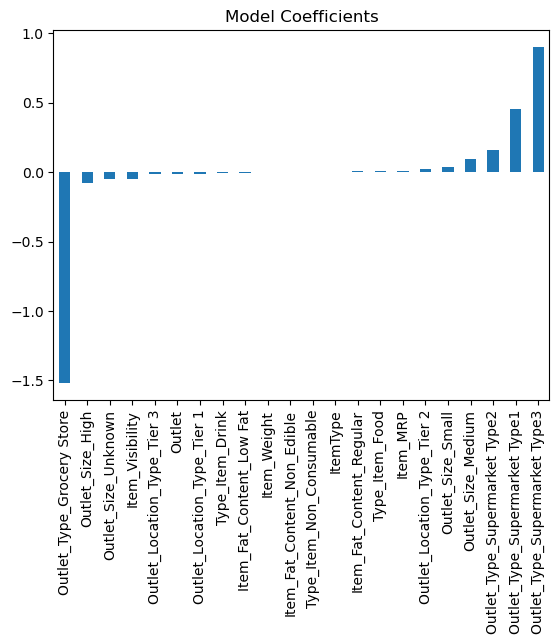

In [104]:
model = Ridge(alpha=.3)
train(model, X, y)
coef = pd.Series(model.coef_, X.columns).sort_values()
coef.plot(kind='bar', title="Model Coefficients")

# RandomForest

Model Report
MSE: 0.042613369345980825
CV Score: 0.3102305440905713


<Axes: title={'center': 'Feature Importance'}>

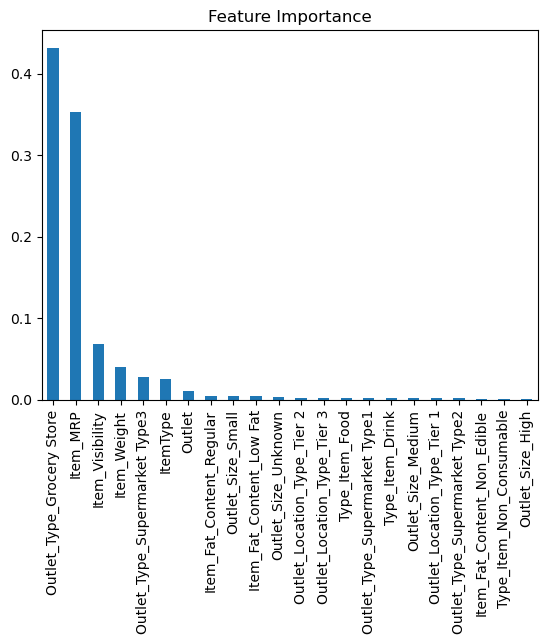

In [105]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
train(model, X, y)
coef = pd.Series(model.feature_importances_, X.columns).sort_values(ascending=False)
coef.plot(kind='bar', title="Feature Importance")